# Análisis de Cuencas: Cambios eustáticos con subsidencia de fondo usando Python

Dr. Fernando J. Gomez

CICTERRA-CONICET-UNC

En este breve tutorial exploraremos algunos de los controles principales en el espacio de acomodación de cuencas sedimentarias. Particularmente controles como **eustatismo**, **subsidencia** y **suministro sedimentario**. El tutorial esta basado en el capítulo 8 del libro de Philip A. Allen & John R. Allen (2013) **Basin Analysis Principles and Application to Petroleum Play Assessment**, y particularmente en el ejemplo numero 51 desarrollado al final del libro.

Un ciclo eustático de cambio del nivel del mar puede expresarse mediante la siguiente expresión:

$$h=h_0sin\left(\frac{2 \pi t}{\lambda}\right)$$

donde $t$ es el tiempo, $\lambda$ es la longitud de onda y $h_0$ es la amplitud (en $m$). Si a esto le sumamos la subsidencia lineal representada por una recta $Subs=at$, donde $a$ es la tasa de subsidencia, entonces sumando ambas tenemos la variación relativa del nivel del mar $h_{rel}$:

$$h_{rel}=h_0sin\left(\frac{2 \pi t}{\lambda}\right)+ at$$

Si diferenciamos la ecuación anterior podemos encontrar los puntos de inflexión de interes en la curva
$$\frac{dh_{rel}}{dt}=h_0 \frac{2 \pi}{\lambda} \cos \left(\frac{2 \pi t}{\lambda}\right)+ a$$

En la siguiente serie graficos podemos ver estas funciones que expresan el eustatismo, la subsidencia lineal, la sumatoria de ambos y la derivada que nos permite ver las tasas de cambio.

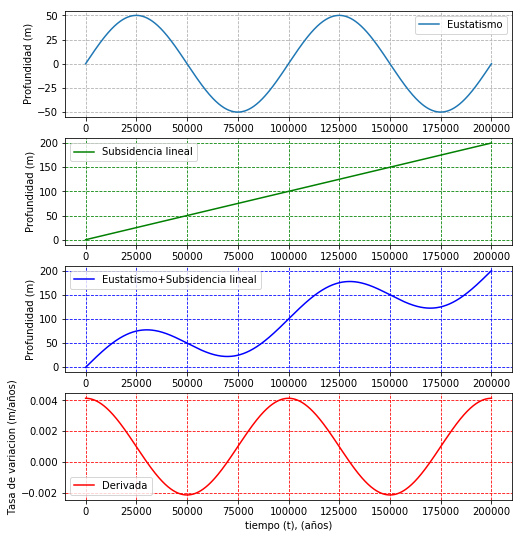

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

h_0=50.0 #amplitud de variaciones eustaticas [m]
lambda_nm=100000.0 #longitud de onda eustatica [años]
a=0.001 #tasa de subsidencia lineal [m/años]
s=0.0005 #Tasa de sedimentacion [m/años]

t=np.linspace(0, 200000, 200000)

def nm_rel(h_0, lambda_nm, a, t, s):
    eust=h_0*np.sin(2.0*np.pi*t/lambda_nm)
    subs=a*t
    h_rel=h_0*np.sin(2.0*np.pi*t/lambda_nm)+a*t
    dh_rel_dt = h_0*2*np.pi/lambda_nm*(np.cos(2.0*np.pi*t/lambda_nm))+a
    return (eust, subs, h_rel, dh_rel_dt)

eust, subs, h_rel, dh_rel_dt=nm_rel(h_0=h_0, lambda_nm=lambda_nm, a=a, t=t, s=s)

fig, ax=plt.subplots(4, 1, figsize=(8, 9))
ax[0].plot(t, eust, label="Eustatismo")
ax[1].plot(t, subs, color="green", label="Subsidencia lineal")
ax[2].plot(t, h_rel, color="blue", label="Eustatismo+Subsidencia lineal")
ax[3].plot(t, dh_rel_dt, color="red", label="Derivada")
ax[2].set_xlabel("tiempo (t), (miles de años)")
ax[0].set_ylabel("Profundidad (m)")
ax[1].set_ylabel("Profundidad (m)")
ax[3].set_ylabel("Profundidad (m)")
ax[2].set_ylabel("Profundidad (m)")
ax[3].set_xlabel("tiempo (t), (años)")
ax[3].set_ylabel("Tasa de variacion (m/años)")
ax[0].grid(linestyle='--')
ax[1].grid(color='green',linestyle='--')
ax[2].grid(color='blue',linestyle='--')
ax[3].grid(color='red',linestyle='--')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
#plt.savefig('sea_level', format='pdf')
plt.show()

Ahora ploteamos los puntos maximos, minimos y de inflexión en la curva:

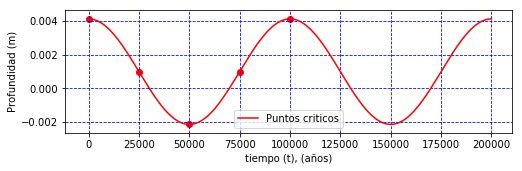

In [28]:
def deriv_nm_rel(h_0, lambda_nm, a, t, s):
    dh_rel_dt = h_0*2*np.pi/lambda_nm*(np.cos(2.0*np.pi*t/lambda_nm))+a
    return (dh_rel_dt)

dh_rel_dt=deriv_nm_rel(h_0=h_0, lambda_nm=lambda_nm, a=a, t=t, s=s)

fig, ax=plt.subplots(figsize=(8, 2.25))

tc=[t[0], t[25000],t[50000],t[75000],t[100000]]
dh_rel_dt_c=[dh_rel_dt[0], dh_rel_dt[25000],dh_rel_dt[50000],dh_rel_dt[75000],dh_rel_dt[100000]]
ax.plot(t, dh_rel_dt, label="Puntos criticos", color='red')
ax.scatter(tc, dh_rel_dt_c, color='red')
ax.set_xlabel("tiempo (t), (años)")
ax.set_ylabel("Profundidad (m)")
ax.grid(linestyle='--',color='blue')
ax.legend()
#plt.savefig('sea_level', format='pdf')
plt.show()

Dado que la sedimentación tambien tiene influencia en el espacio de acomodación (disminuyendo el espacio) debemos incluirla en el análisis. Usaremos el enfoque dado en el ejemplo original, donde la tasa de sedimentación esta acoplada de alguna manera a la de variación del nivel del mar pero con un cierto retardo. Esto es razonable dado que, una vez que una zona es expuesta por una caída del nivel del mar, es necesario un tiempo en que el sedimento es generado y transportado, de esta forma tenemos:

$$S_{t}=s_0 \frac{\lambda}{\pi}\left(\cos \left[ \frac{\pi t}{\lambda}\right]-1\right)$$

Aqui $s_0$ es la tasa de sedimentación inicial.

De esta manera, combinando la segunda y tercera ecuación tenemos la profundidad hasta la interfase agua-sedimento:

$$P_t=h_0sin\left(\frac{2 \pi t}{\lambda}\right)+ at-s_0 \frac{\lambda}{\pi}\left(\cos \left[ \frac{\pi t}{\lambda}\right]-1\right)$$

Aqui, el primer termino representa las variaciones eustáticas, el segundo la tasa de subsidencia lineal y el tercero el suministro sedimentario.

En el siguiente código y la figura asociada podemos ver como estas variables se relacionan:

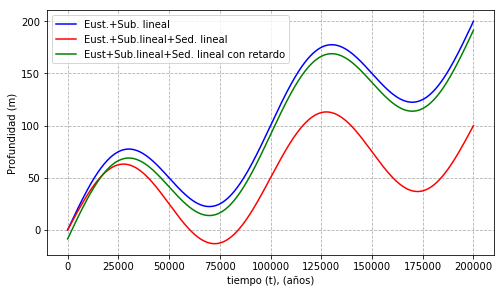

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h_0=50.0 #amplitud de variaciones eustaticas [m]
lambda_nm=100000.0 #longitud de onda eustatica [años]
a=0.001 #tasa de subsidencia lineal [m/años]
s=0.0005 #Tasa de sedimentacion [m/años]


t=np.linspace(0, 200000, 200000)


def nm_rel(h_0, lambda_nm, a, t, s):
    h_rel=h_0*np.sin(2.0*np.pi*t/lambda_nm)+a*t
    pf_sl=h_0*np.sin(2.0*np.pi*t/lambda_nm)+a*t-s*t
    pf_del=h_0*np.sin(2.0*np.pi*t/lambda_nm)+a*t-(s*lambda_nm/np.pi)*(np.cos(np.pi/lambda_nm-1))
    return (h_rel, pf_sl, pf_del)

h_rel, pf_sl, pf_del=nm_rel(h_0=h_0, lambda_nm=lambda_nm, a=a, t=t, s=s)


fig, ax=plt.subplots(figsize=(8, 4.5))
ax.plot(t, h_rel, color="blue", label="Eust.+Sub. lineal")
ax.plot(t, pf_sl, color="red", label="Eust.+Sub.lineal+Sed. lineal")
ax.plot(t, pf_del, color="green", label="Eust+Sub.lineal+Sed. lineal con retardo")
ax.set_xlabel("tiempo (t), (años)")
ax.set_ylabel("Profundidad (m)")
ax.grid(linestyle='--')
ax.legend()
#plt.savefig('sea_level', format='pdf')
plt.show()
